<a href="https://colab.research.google.com/github/Starleen1996/Machine_Learning_modelos/blob/main/Haga_Lo_que_hicimos_Validacion_De_modelos_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Para correr las lineas de código debemos importar : /content/diabetes.csv

In [2]:
import pandas as pd

In [3]:
datos = pd.read_csv('/content/diabetes.csv')

In [4]:
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


#### 1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [6]:
X = datos.drop(columns='diabetes', axis=1)
y = datos['diabetes']

#### Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.05,stratify=y,random_state=5) # Modelo de entrenamiento
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,stratify=y,random_state=5) # Modelo de validación

La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Modelo arbol de decisión con 3 niveles (max_depth)
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train,y_train)
print('Precisión entrenamiento: ',modelo.score(X_train,y_train))
print('Precisión de validación: ',modelo.score(X_val,y_val))

Precisión entrenamiento:  0.7571428571428571
Precisión de validación:  0.776595744680851


In [11]:
# Modelo RandomForestClasifier
modelo_1 = RandomForestClassifier(max_depth=2)
modelo_1.fit(X_train,y_train)
print('Precisión entrenamiento: ',modelo_1.score(X_train,y_train))
print('Precisión de validación: ',modelo_1.score(X_val,y_val))

Precisión entrenamiento:  0.7321428571428571
Precisión de validación:  0.7127659574468085


La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [12]:
#Importamos una nueva herramienta llamada la matriz de confusión para el modelo Arbol de decisión
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[52 11]
 [10 21]]


In [14]:
# Vamos a graficar la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

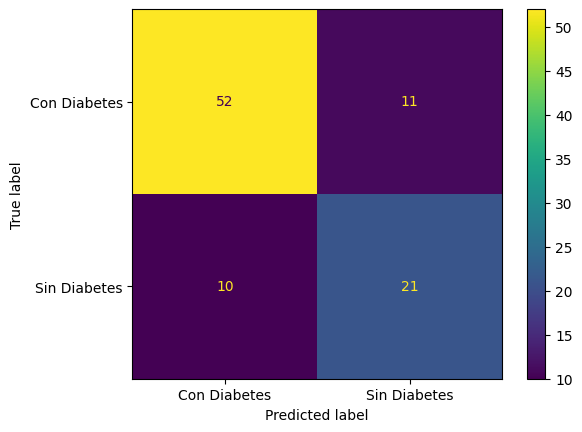

In [15]:
## Esto es una matriz de confusión
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=['Con Diabetes','Sin Diabetes'])
visualizacion.plot();

In [16]:
## Vamos a ver la MATRIZ DE CONFUSION PARA EL MODELO RANDOM_FORETS_CLASIFFIER
y_previsto_1 = modelo_1.predict(X_val)
matriz_confusion_1 = confusion_matrix(y_val,y_previsto_1)
print(matriz_confusion_1)

[[57  6]
 [21 10]]


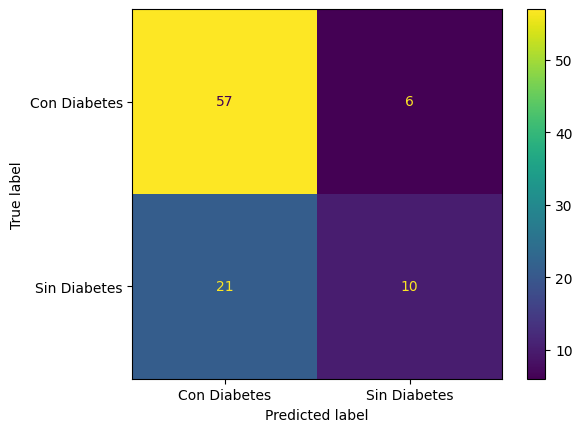

In [17]:
## Esto es una matriz de confusión
visualizacion_1 = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_1,display_labels=['Con Diabetes','Sin Diabetes'])
visualizacion_1.plot();

# Este modelo presenta un sesgo mayor de los pacientes con diabetes (20)

## HAGA LO QUE HICIMOS -METRICAS DE EVALUACIÓN

Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [19]:
print(f'La preciisón del modelo es de: {precision_score(y_val, y_previsto)}')
print(f'La Sensibilidad(Recall) del modelo es de: {recall_score(y_val, y_previsto)}')
print(f'La Exactitud (accuracy)  del modelo es de: {accuracy_score(y_val, y_previsto)}')

La preciisón del modelo es de: 0.65625
La Sensibilidad(Recall) del modelo es de: 0.6774193548387096
La Exactitud (accuracy)  del modelo es de: 0.776595744680851


In [20]:
print(f'El F1 Score  del modelo es de: {f1_score(y_val, y_previsto)}')
# Mientras mas lejos de 1, el modelo se esta desempeñando muy mal

El F1 Score  del modelo es de: 0.6666666666666666


2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

In [21]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

In [22]:
from sklearn.metrics import RocCurveDisplay

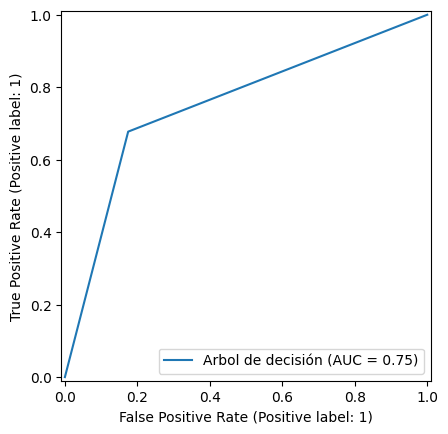

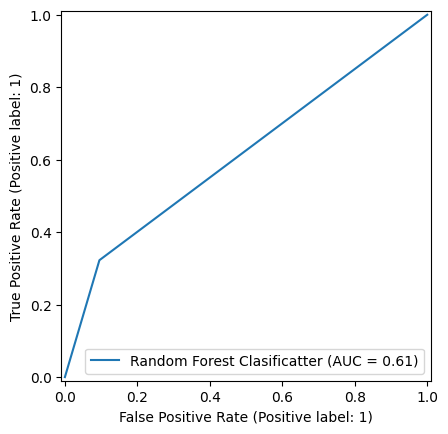

In [23]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')
# Nota: La curva se quiebra en el valor positivo (0.7).

RocCurveDisplay.from_predictions(y_val, y_previsto_1, name='Random Forest Clasificatter')
# Nota: La curva se quiebra en el valor positivo (0.38) aproximadamente.

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
print(f'El área bajo la curva ROC del modelo Arbol de Decisión es de: {roc_auc_score(y_val, y_previsto)}')
print(f'El área bajo la curva ROC del modelo Random Forest es de: {roc_auc_score(y_val, y_previsto_1)}')

El área bajo la curva ROC del modelo Arbol de Decisión es de: 0.7514080901177674
El área bajo la curva ROC del modelo Random Forest es de: 0.6136712749615975


Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

In [26]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

In [27]:
from sklearn.metrics import PrecisionRecallDisplay

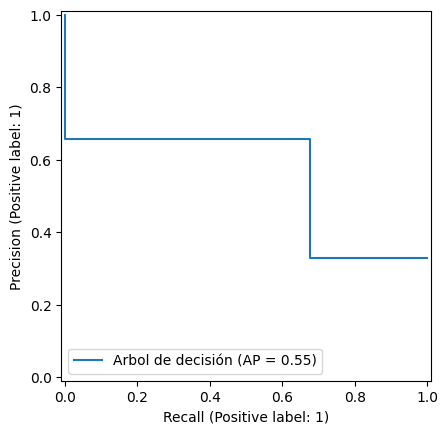

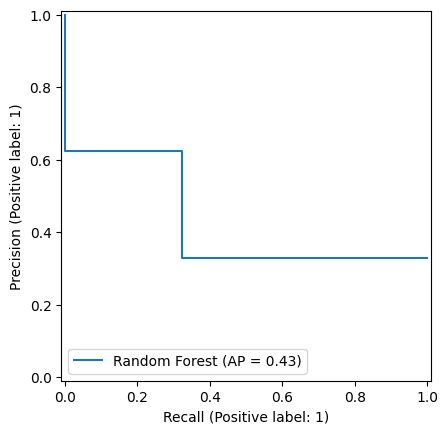

In [28]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')
#
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_1, name='Random Forest')
#

In [29]:
from sklearn.metrics import average_precision_score

In [30]:
print(f'El área bajo la curva de precisión y sensibilidad para el modelo Arbol de Decisión es de: {average_precision_score(y_val, y_previsto)}')
print(f'El área bajo la curva de precisión y sensibilidad para el modelo Random Forest es de: {average_precision_score(y_val, y_previsto_1)}')

El área bajo la curva de precisión y sensibilidad para el modelo Arbol de Decisión es de: 0.5509394303363074
El área bajo la curva de precisión y sensibilidad para el modelo Random Forest es de: 0.42501715854495536


Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_val, y_previsto)) # Informe Metricas para el modelo arbol de decisión
print(classification_report(y_val, y_previsto_1))# Informe Metricas para el modelo Random Forest

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        63
           1       0.62      0.32      0.43        31

    accuracy                           0.71        94
   macro avg       0.68      0.61      0.62        94
weighted avg       0.70      0.71      0.68        94



## HAGA LO QUE HICIMOS - VALIDACIONES CRUZADAS

En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

In [33]:
# 1 - Para calcular el intervalo de confianza de los resultados de la validación cruzada, necesitamos la lista de resultados y también el nombre del modelo para presentarlo en la función print. Vamos a crear una función llamada intervalo_conf que recibe dos parámetros: resultados y nombre_modelo.
#A partir de los resultados, podemos extraer la media y la desviación estándar y generar el intervalo de confianza que está a una distancia de dos desviaciones estándar por debajo y por encima de esa media:

def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

In [34]:
# 2 - El primer paso a realizar es importar la función cross_val_score y el método KFold:

import sklearn.model_selection
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [35]:
modelo_1 = DecisionTreeClassifier(max_depth=3)
modelo_2 = RandomForestClassifier(max_depth=2)

kf = KFold(n_splits=10, shuffle=True, random_state=5)

resultado_1 = cross_val_score(modelo_1, X, y, cv=kf)
resultado_2 = cross_val_score(modelo_2, X, y, cv=kf)

intervalo_conf(resultado_1, 'Arbol de decisión')
intervalo_conf(resultado_2, 'Random Forest')

Intervalo de confianza (Arbol de decisión): [0.5292910838089362, 0.8675794709563556]
Intervalo de confianza (Random Forest): [0.6145996349980573, 0.7647744759550009]


3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

In [37]:
import sklearn.model_selection
from sklearn.model_selection import StratifiedKFold

modelo_1 = DecisionTreeClassifier(max_depth=3)
modelo_2 = RandomForestClassifier(max_depth=2)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

resultado_1 = cross_val_score(modelo_1, X, y, cv=skf, scoring='f1')
resultado_2 = cross_val_score(modelo_2, X, y, cv=skf, scoring='f1')

intervalo_conf(resultado_1, 'Arbol de decisión')
intervalo_conf(resultado_2, 'Random Forest')

Intervalo de confianza (Arbol de decisión): [0.271659875902482, 0.7462406274736961]
Intervalo de confianza (Random Forest): [0.047777907137899644, 0.6053360050936597]


4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza.

In [44]:
from sklearn.model_selection import LeaveOneOut

modelo_1 = DecisionTreeClassifier(max_depth=3)
modelo_2 = RandomForestClassifier(max_depth=2)

loo = LeaveOneOut()

resultado_1 = cross_val_score(modelo_1, X, y, cv=loo)
resultado_2 = cross_val_score(modelo_2, X, y, cv=loo)

print(f' Precisión de medida de Arbol de decisión: {resultado_1.mean()}')
print(f'Precision de medida  Random Forest: {resultado_2.mean()}')
#

 Precisión de medida de Arbol de decisión: 0.7085561497326203
Precision de medida  Random Forest: 0.6818181818181818


## HAGA LO QUE HICIMOS - BALANCEO DE DATOS

#### 1 - El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, utilizando el método value_counts(normalize=True) o con la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca seaborn para entender si hay un desbalanceo de datos.

In [45]:
datos['diabetes'].value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


2 - Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

In [46]:
#2 - El primer paso es importar el método Pipeline y el SMOTE para balancear los datos:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [48]:
# Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de oversampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo_1)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultados_1 = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_1.mean()}')

F1 (Decision Tree):0.7085561497326203


In [49]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', modelo_2)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultados_2 = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_2.mean()}')

F1 (Random Forest):0.6818181818181818


#### 3 - Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

In [50]:
#El primer paso es importar el método Pipeline y el NearMiss para balancear los datos:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [51]:
#Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de undersampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo_1)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_1 = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_1.mean()}')

F1 (Decision Tree):0.5449681473471796


In [52]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', modelo_2)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_2 = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_2.mean()}')

F1 (Random Forest):0.5789796773375337


#### El modelo que obtuvo mayor rendimiento en las pruebas del desafío fue el RandomForest, usando el max_depth = 2 en la estrategia de undersampling. Por lo tanto, vamos a balancear los datos y utilizar este modelo en todos los datos balanceados. Por último, vamos a validar el modelo en datos de prueba, no vistos hasta ahora:

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



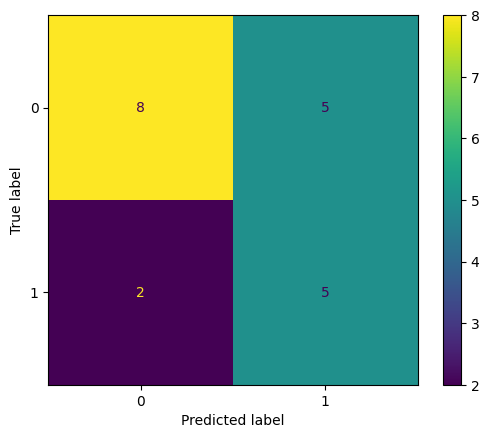

In [53]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);